In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Load dataset
df = pd.read_csv('US_Accidents.csv')

In [22]:
# Convert 'Start_Time' to datetime with day-first format handling and coercing errors
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce', dayfirst=True)

# Drop rows with failed date conversions
df = df.dropna(subset=['Start_Time'])

# Extract time-based features
df['Hour'] = df['Start_Time'].dt.hour
df['Day_of_Week'] = df['Start_Time'].dt.dayofweek


C:\Users\Mithun kumar\AppData\Local\Temp\ipykernel_12800\2348821076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette="viridis")


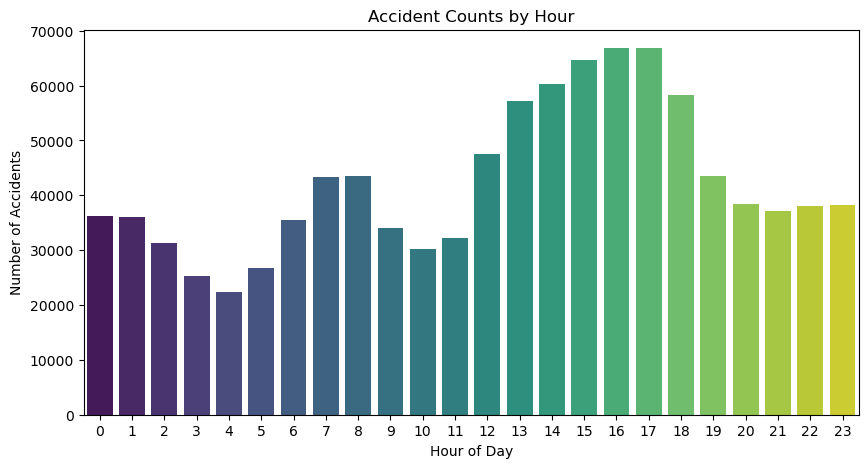

In [23]:
# EDA and Visualization
## Accident Distribution by Hour of the Day
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette="viridis")
plt.title('Accident Counts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

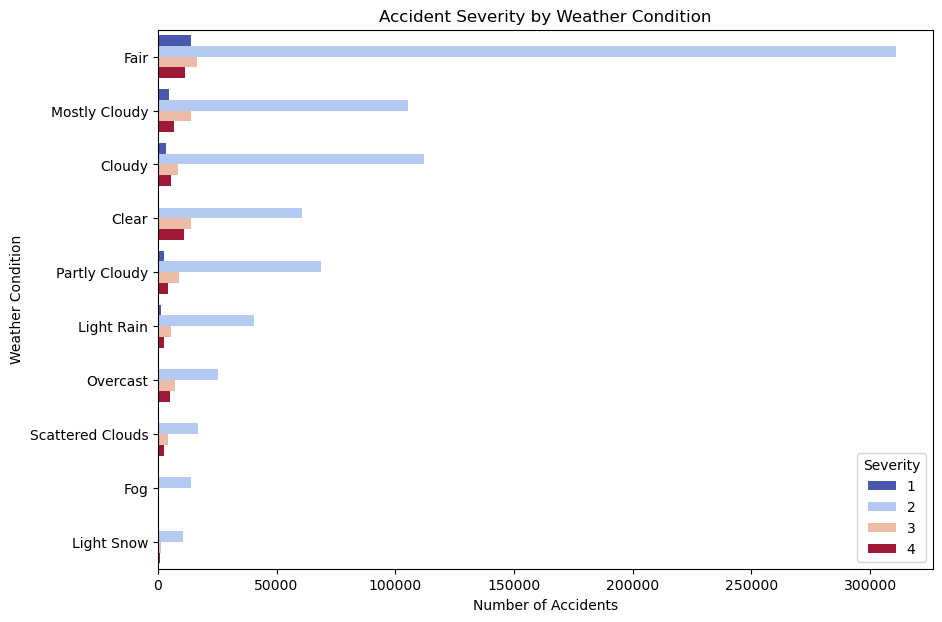

In [24]:
## Accident Severity by Weather Conditions
plt.figure(figsize=(10, 7))
sns.countplot(y='Weather_Condition', hue='Severity', data=df, palette="coolwarm", order=df['Weather_Condition'].value_counts().index[:10])
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.legend(title='Severity')
plt.show()

C:\Users\Mithun kumar\AppData\Local\Temp\ipykernel_12800\883052465.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_Week', data=df, palette="magma")


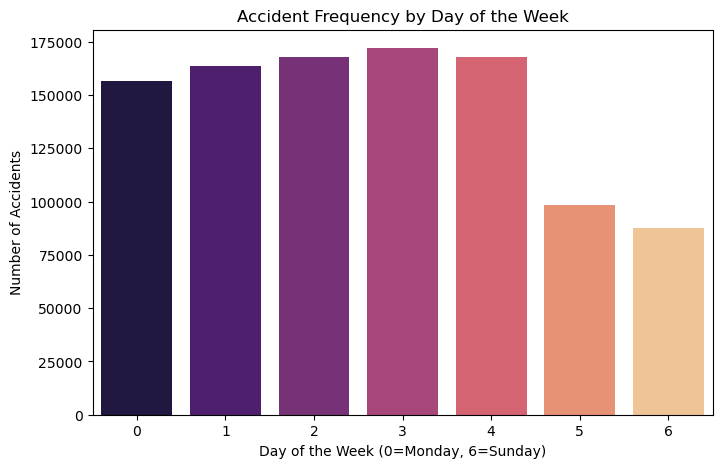

In [25]:
## Accident Frequency by Day of the Week
plt.figure(figsize=(8, 5))
sns.countplot(x='Day_of_Week', data=df, palette="magma")
plt.title('Accident Frequency by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Accidents')
plt.show()

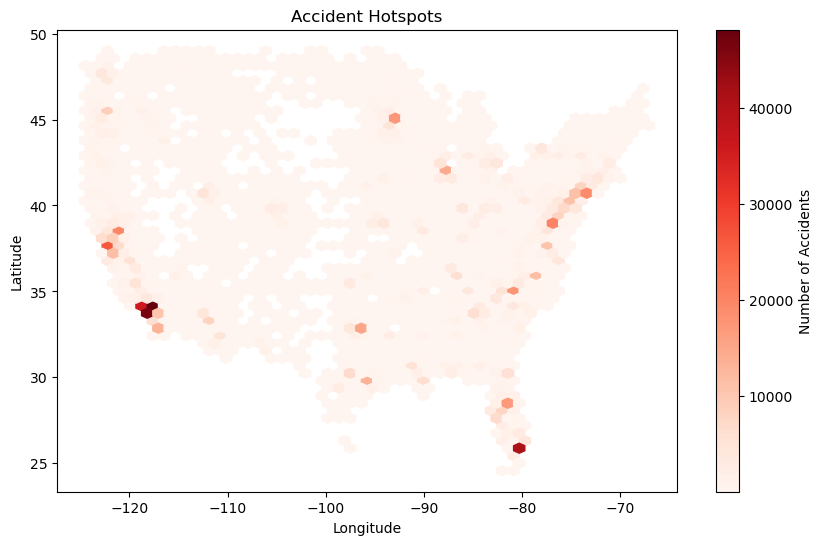

In [26]:
# Hotspot Analysis using 2D Hexbin Plot
plt.figure(figsize=(10, 6))
plt.hexbin(df['Start_Lng'], df['Start_Lat'], gridsize=50, cmap='Reds', mincnt=1)
plt.colorbar(label='Number of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Hotspots')
plt.show()

In [27]:
# DBSCAN Clustering for Hotspot Identification
location_data = df[['Start_Lat', 'Start_Lng']].dropna().values
dbscan = DBSCAN(eps=0.05, min_samples=50).fit(location_data)
df['Cluster'] = dbscan.labels_

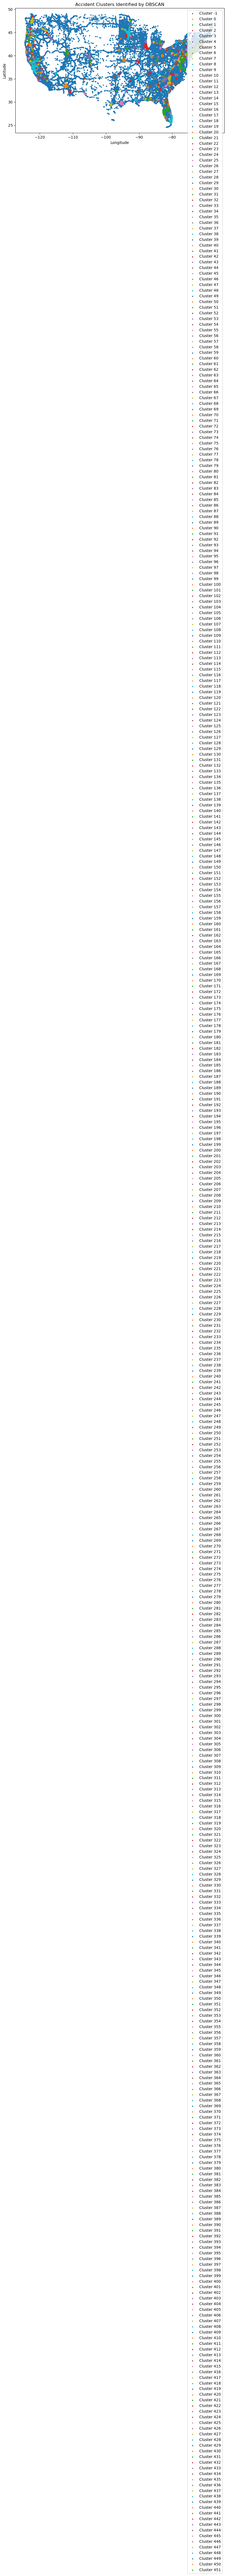

In [28]:
# Plot DBSCAN Clusters
plt.figure(figsize=(10, 6))
unique_clusters = np.unique(dbscan.labels_)
for cluster in unique_clusters:
    clustered_points = location_data[dbscan.labels_ == cluster]
    plt.scatter(clustered_points[:, 1], clustered_points[:, 0], label=f'Cluster {cluster}', s=5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Clusters Identified by DBSCAN')
plt.legend(loc='best')
plt.show()

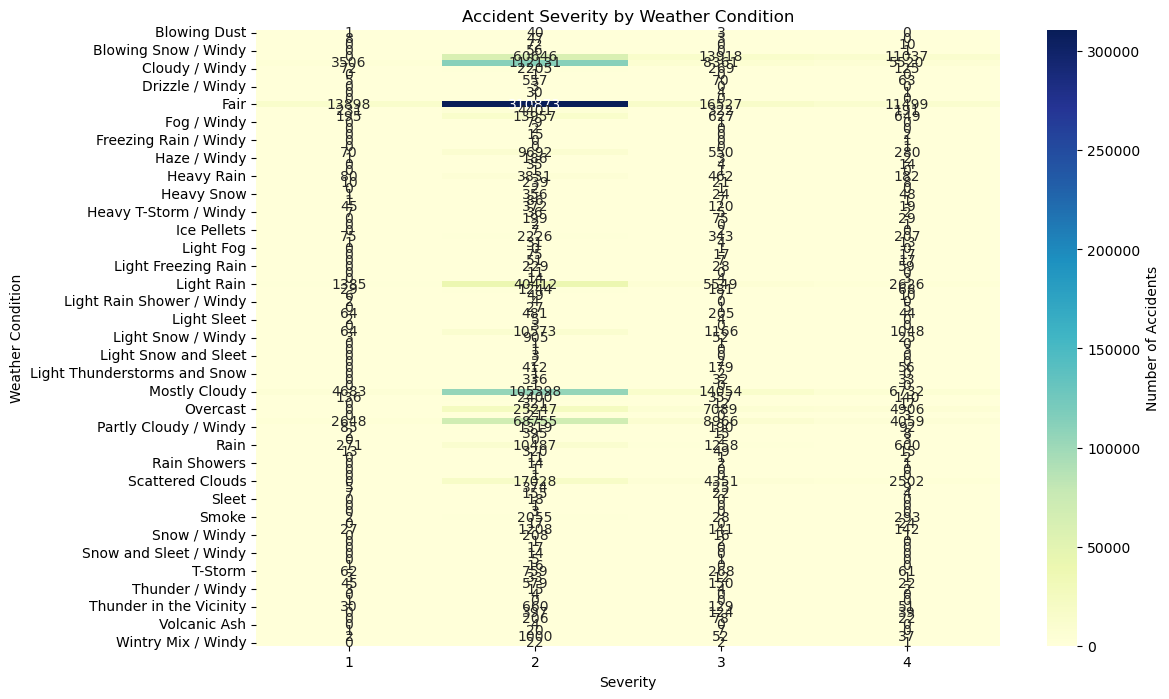

In [29]:
# Heatmap of Accident Severity by Weather Condition
severity_weather = pd.crosstab(df['Weather_Condition'], df['Severity'])
plt.figure(figsize=(12, 8))
sns.heatmap(severity_weather, cmap="YlGnBu", annot=True, fmt="d", cbar_kws={'label': 'Number of Accidents'})
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Severity')
plt.ylabel('Weather Condition')
plt.show()

In [30]:
# Summary of Findings
print("Analysis complete. This data provides insights on accident distribution across time, weather, and geography.")

Analysis complete. This data provides insights on accident distribution across time, weather, and geography.
